In [1]:

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(argparse))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
model_name <- "DMSO_0.025_vs_LPS_100"
celltype <- "SHSY5Y"

In [3]:
# read in the data
output_file <- file.path(
    "..","..","figures","Regression",model_name,celltype,"regression_plots.pdf"
)
results_dir <- file.path(
    "..","..","results","Regression",model_name,celltype
)
results_file <- file.path(
    results_dir,"regression_results_training.csv"
)

# Read in the results file
df <- read.csv(results_file)
head(df,3)

,Actual,Average.Predicted,cytokine,Metadata_Well,model_type,shuffled_data,oneb_Metadata_Treatment_Dose_Inhibitor_Dose
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.2190074,0.596817,IL-1 beta [NSU],J20,train,True,LPS_100.000_DMSO_0.025
2,0.9226051,0.596817,IL-1 beta [NSU],I15,train,True,DMSO_0.100_DMSO_0.025
3,0.6478423,0.596817,IL-1 beta [NSU],J15,train,True,DMSO_0.100_DMSO_0.025


In [4]:
print(unique(df$shuffled_data))
print(unique(df$model_type))
print(length(unique(df$cytokine)))
print((unique(df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)))

[1] "True"  "False"
[1] "train"      "validation" "test"       "holdout"   
[1] 2
[1] "LPS_100.000_DMSO_0.025" "DMSO_0.100_DMSO_0.025" 


In [5]:
# # select rwos that are training data only 
# df <- df %>% filter(model_type == "validation")

In [6]:
pdf(file=output_file)
for (i in 1:length(unique(df$cytokine))){
    tmpdf <- df %>% filter(cytokine == unique(df$cytokine)[i])
    # linear trend + confidence interval
    p3 <- (
    ggplot(tmpdf, aes(
        x=Actual, 
        y=Average.Predicted, 
        shape=shuffled_data,
        color=oneb_Metadata_Treatment_Dose_Inhibitor_Dose, 
        linetype=shuffled_data
        )) 
    + geom_point() 
    # + geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) 
    + geom_smooth(method=lm , se=TRUE, formula = y ~ x)
    + labs(x="Actual", y="Predicted", title="Regression Plot")
    + theme(plot.title = element_text(hjust = 0.5))
    + theme(legend.title=element_blank())
    + ggtitle(paste0("Regression for ",unique(df$cytokine)[i])
        )
    )
    plot(p3) 
}
dev.off()

png 
  2

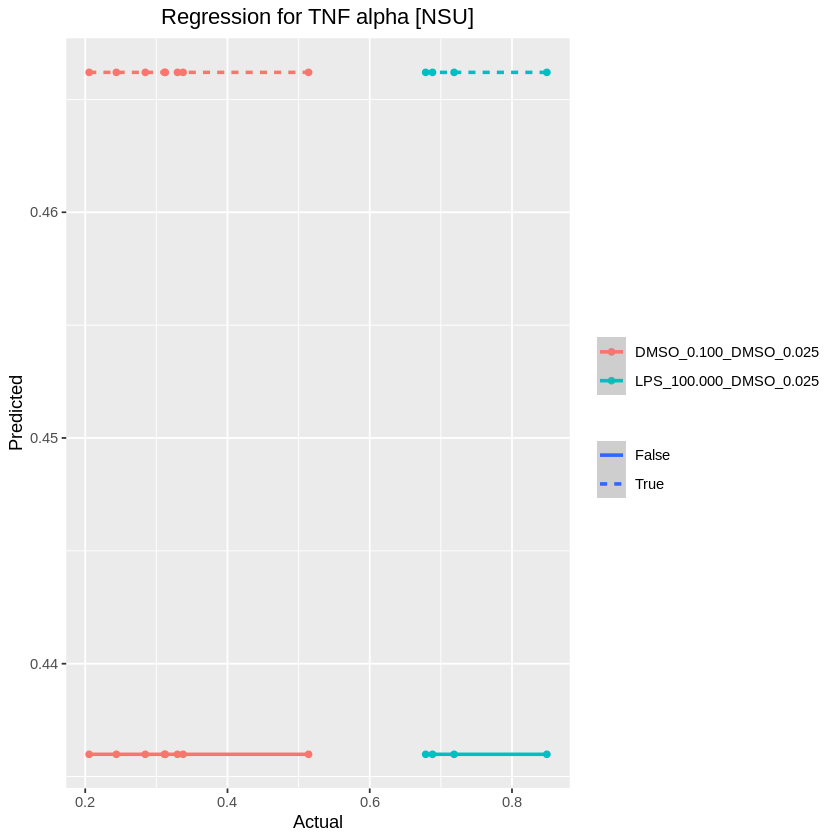

In [10]:
# linear trend + confidence interval
p3 <- (
    ggplot(tmpdf, aes(
        x=Actual, 
        y=Average.Predicted, 
        color=oneb_Metadata_Treatment_Dose_Inhibitor_Dose, 
        linetype=shuffled_data
        )) 
    + geom_point() 
    # + geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) 
    + geom_smooth(method=lm , se=TRUE, formula = y ~ x)
    + labs(x="Actual", y="Predicted", title="Regression Plot")
    + theme(plot.title = element_text(hjust = 0.5))
    + theme(legend.title=element_blank())
    + ggtitle(paste0("Regression for ",unique(df$cytokine)[i])
        )
    )
p3